In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [4]:
train = pd.read_csv("train_indessa.csv")
test = pd.read_csv("test_indessa.csv")

In [5]:
train["source"] = "train"
test["source"] = "test"

In [6]:
train.shape

(532428, 46)

In [7]:
data = pd.concat([train,test],ignore_index=True)

In [7]:
data.apply(lambda x: sum(x.isnull()))

acc_now_delinq                     29
addr_state                          0
annual_inc                          4
application_type                    0
batch_enrolled                 130748
collection_recovery_fee             0
collections_12_mths_ex_med        145
delinq_2yrs                        29
desc                           761598
dti                                 0
emp_length                          0
emp_title                       51457
funded_amnt                         0
funded_amnt_inv                     0
grade                               0
home_ownership                      0
initial_list_status                 0
inq_last_6mths                     29
int_rate                            0
last_week_pay                       0
loan_amnt                           0
loan_status                    354951
member_id                           0
mths_since_last_delinq         454312
mths_since_last_major_derog    665676
mths_since_last_record         750326
open_acc    

In [8]:
from sklearn.ensemble import RandomForestClassifier
data.dtypes

acc_now_delinq                 float64
addr_state                      object
annual_inc                     float64
application_type                object
batch_enrolled                  object
collection_recovery_fee        float64
collections_12_mths_ex_med     float64
delinq_2yrs                    float64
desc                            object
dti                            float64
emp_length                      object
emp_title                       object
funded_amnt                      int64
funded_amnt_inv                float64
grade                           object
home_ownership                  object
initial_list_status             object
inq_last_6mths                 float64
int_rate                       float64
last_week_pay                   object
loan_amnt                        int64
loan_status                    float64
member_id                        int64
mths_since_last_delinq         float64
mths_since_last_major_derog    float64
mths_since_last_record   

In [9]:
columns = ["funded_amnt_inv","funded_amnt","inq_last_6mths","mths_since_last_delinq","mths_since_last_major_derog"
           ,"loan_status","annual_inc", "mths_since_last_record","tot_coll_amt","tot_cur_bal","total_rev_hi_lim","total_rec_int","total_rec_late_fee"
          
          
]

In [10]:
train[columns].corr()

,funded_amnt_inv,funded_amnt,inq_last_6mths,mths_since_last_delinq,mths_since_last_major_derog,loan_status,annual_inc,mths_since_last_record,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,total_rec_int,total_rec_late_fee
funded_amnt_inv,1.000000,0.998041,-0.038378,-0.035713,-0.037181,-0.101877,0.329495,0.007380,-0.019995,0.327981,0.308022,0.529116,0.027770
funded_amnt,0.998041,1.000000,-0.034298,-0.038058,-0.037214,-0.097563,0.330493,-0.012119,-0.019994,0.327955,0.307988,0.531616,0.031022
inq_last_6mths,-0.038378,-0.034298,1.000000,0.013275,0.019156,0.087339,0.033426,-0.085680,0.013787,0.033267,0.006220,0.087688,0.033678
mths_since_last_delinq,-0.035713,-0.038058,0.013275,1.000000,0.699173,0.029236,-0.051903,0.021387,0.032696,-0.094698,-0.024684,-0.030993,-0.021201
mths_since_last_major_derog,-0.037181,-0.037214,0.019156,0.699173,1.000000,-0.010214,-0.039256,0.032133,0.029274,-0.070526,-0.018727,-0.058309,-0.007711
loan_status,-0.101877,-0.097563,0.087339,0.029236,-0.010214,1.000000,-0.008596,0.073566,-0.013165,0.014579,-0.019547,0.038344,-0.004353
annual_inc,0.329495,0.330493,0.033426,-0.051903,-0.039256,-0.008596,1.000000,-0.104513,0.000196,0.416120,0.265846,0.127483,0.013254
mths_since_last_record,0.007380,-0.012119,-0.085680,0.021387,0.032133,0.073566,-0.104513,1.000000,-0.065135,-0.028431,-0.033476,0.083080,-0.028594
tot_coll_amt,-0.019995,-0.019994,0.013787,0.032696,0.029274,-0.013165,0.000196,-0.065135,1.000000,-0.006267,-0.023475,-0.019355,-0.003160
tot_cur_bal,0.327981,0.327955,0.033267,-0.094698,-0.070526,0.014579,0.416120,-0.028431,-0.006267,1.000000,0.380439,0.131922,0.011786


In [ ]:
#plt.matshow(train[columns].corr())
pd.scatter_matrix(train[columns[:1]], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

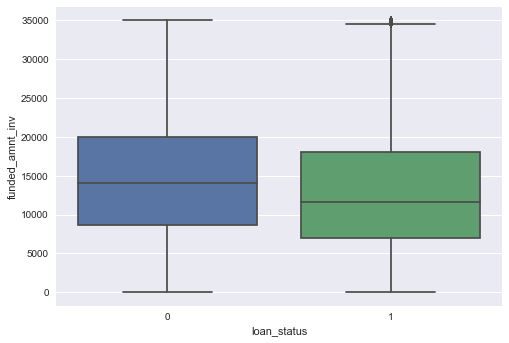

In [8]:
seaborn.boxplot(train.loan_status,train.funded_amnt_inv)

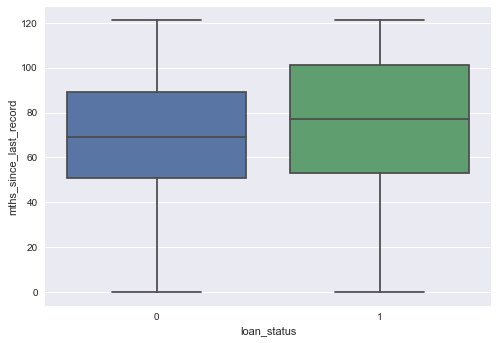

In [21]:
seaborn.boxplot(train.loan_status,train.mths_since_last_record)

In [13]:
train.term = train["term"].apply(lambda x: d[x])

In [48]:
sum(train.term==1)

159635

In [12]:
sum(train.term=='36 months')

d = {"36 months":0,"60 months":1}

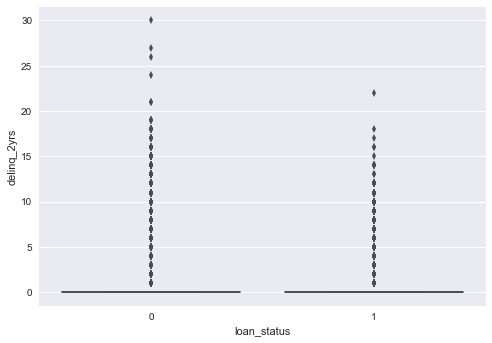

In [14]:
seaborn.boxplot(train.loan_status,train.delinq_2yrs)

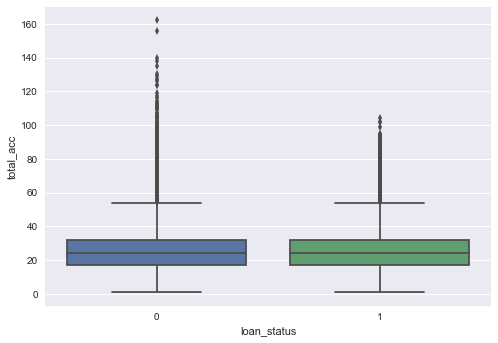

In [14]:
seaborn.boxplot(train.loan_status,train.total_acc)

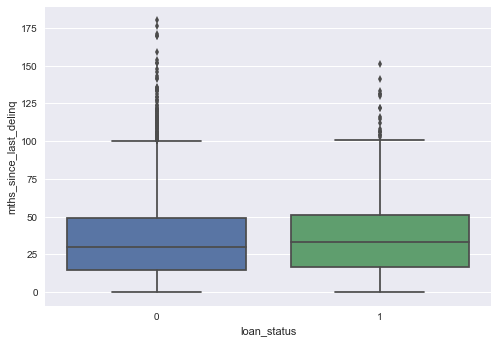

In [9]:
seaborn.boxplot(train.loan_status,train.mths_since_last_delinq)

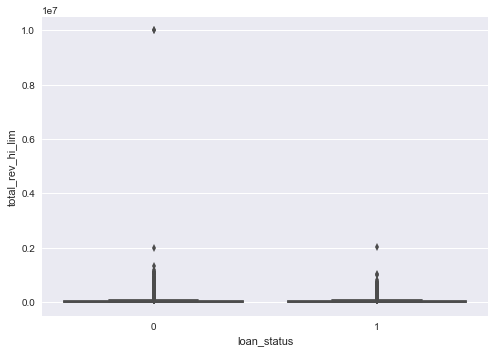

In [22]:
seaborn.boxplot(train.loan_status,train.total_rev_hi_lim)

In [45]:
columnsexclude = ["funded_amnt_inv","inq_last_6mths","emp_length",
           "home_ownership","verification_status","pymnt_plan","total_acc","collection_recovery_fee",
               "tot_cur_bal","application_type","title","home_ownership","member_id"]

In [35]:
data[columnsexclude].apply(lambda x:sum(x.isnull()))

funded_amnt_inv                0
inq_last_6mths                29
emp_length                     0
home_ownership                 0
verification_status            0
pymnt_plan                     0
total_acc                     29
collection_recovery_fee        0
tot_cur_bal                70276
application_type               0
title                        151
home_ownership                 0
dtype: int64

In [53]:
columsncategorical = [i for i in columnsexclude if train.dtypes[i]=="object"]

In [54]:
columsncategorical

['emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'application_type',
 'title',
 'home_ownership']

In [87]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [39]:
data.fillna(-9999, inplace=True)

In [55]:
for i in ["member_id"]:
    le = LabelEncoder()
    data[i] = le.fit_transform(data[i])

In [60]:
train_x = data[data["source"]=="train"]
test_x = data[data["source"]=="test"]

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
model = RandomForestClassifier()
model.fit(train_x[columnsexclude],train_x["loan_status"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
predictions = model.predict_proba(test_x[columnsexclude])

In [90]:
p = []
for i in predictions:
    a = np.max(i)
    if a==1.0:
        p.append(0.9)
    else:
        p.append(a)

In [88]:
model1 = LogisticRegression()
model1.fit(train_x[columnsexclude],train_x["loan_status"])
predictions1 = model.predict_proba(test_x[columnsexclude])

In [89]:
predictions1[:10]

array([[ 0.7,  0.3],
       [ 0.9,  0.1],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 1. ,  0. ],
       [ 0.7,  0.3],
       [ 0.9,  0.1],
       [ 1. ,  0. ],
       [ 0. ,  1. ]])

In [92]:
output = pd.DataFrame()
output["member_id"] = test["member_id"]
output["loan_status"] = p
output.to_csv("model1.csv",index=False)

In [ ]:
categoricalcolumns = [x for x in allColumns if train.dtypes[x]=="object"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categoricalcolumns:
    train[i] = le.fit_transform(train[i])


In [ ]:
train.head()

In [ ]:
target = "loan_status"
allColumns = [x for x in allColumns if x not in [target,"source"]]

In [ ]:
allColumns

In [ ]:
model.fit(train[allColumns],train[target])

In [ ]:
train.plot()

In [91]:
p

[0.69999999999999996,
 0.90000000000000002,
 0.9,
 0.9,
 0.9,
 0.9,
 0.69999999999999996,
 0.90000000000000002,
 0.9,
 0.9,
 0.69999999999999996,
 0.9,
 0.90000000000000002,
 0.80000000000000004,
 0.9,
 0.9,
 0.59999999999999998,
 0.90000000000000002,
 0.80000000000000004,
 0.80000000000000004,
 0.9,
 0.69999999999999996,
 0.59999999999999998,
 0.90000000000000002,
 0.9,
 0.9,
 0.90000000000000002,
 0.69999999999999996,
 0.9,
 0.9,
 0.9,
 0.69999999999999996,
 0.9,
 0.59999999999999998,
 0.90000000000000002,
 0.69999999999999996,
 0.69999999999999996,
 0.9,
 0.80000000000000004,
 0.5,
 0.80000000000000004,
 0.69999999999999996,
 0.9,
 0.9,
 0.90000000000000002,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.90000000000000002,
 0.9,
 0.69999999999999996,
 0.59999999999999998,
 0.80000000000000004,
 0.90000000000000002,
 0.9,
 0.69999999999999996,
 0.5,
 0.90000000000000002,
 0.90000000000000002,
 0.9,
 0.80000000000000004,
 0.9,
 0.9,
 0.9,
 0.69999999999999996,
 0.9,
 0.90000000000000002,
 0.8